Import thư viện

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

Make datasets

In [43]:
X, y = datasets.make_classification(n_samples=50, n_features=2, n_informative = 2,n_redundant = 0 ,n_classes=2, n_clusters_per_class=1,class_sep=1.5,shuffle=False,random_state=12346)


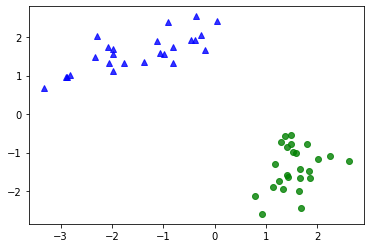

In [44]:
X0 = X[y == 0,:]
X1 = X[y == 1,:]
plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)

In [45]:
X.shape

(50, 2)

## Gradient Descent

In [46]:
class LogisticRegression:
    def __init__(self, X, learning_rate=0.1, num_iters=10000):
        self.lr = learning_rate
        self.num_iters = num_iters
        self.m, self.n = X.shape
    def train(self, X, y):
        self.weights = np.zeros((self.n, 1))
        self.bias = 0
        for it in range(self.num_iters + 1):
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            cost = (-1/self.m * np.sum(y * np.log(y_predict) + (1 - y) * np.log(1 - y_predict)))
            dw = 1 / self.m * np.dot(X.T, (y_predict - y))
            db = 1 / self.m * np.sum(y_predict - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db


        return self.weights, self.bias

    def predict(self, X):
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = y_predict > 0.5

        return y_predict_labels

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


In [47]:
y = y[:, np.newaxis]
log= LogisticRegression(X)
w, b = log.train(X, y)
y_predict = log.predict(X)

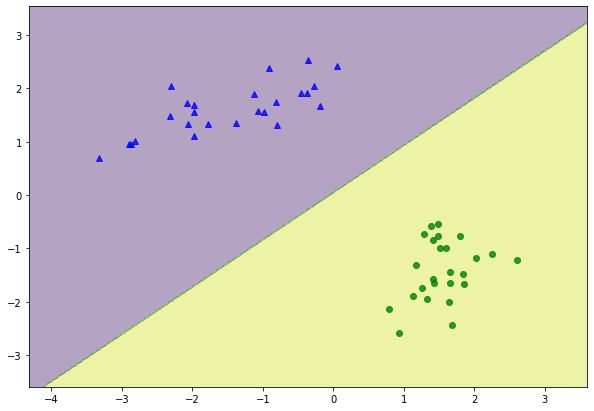

In [54]:
arr1 = np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.01)
arr2 = np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.01)
xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = log.predict(input_array)
plt.figure(figsize =(10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = .4)
plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)

##Scikit-learn

In [56]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [57]:
print(log.coef_,log.intercept_)

[[ 1.27092824 -1.46634566]] [0.1054676]


In [58]:
xx = np.linspace(-4,4,4)
yy = (-xx*log.coef_[0,0] - log.intercept_)/log.coef_[0,1]

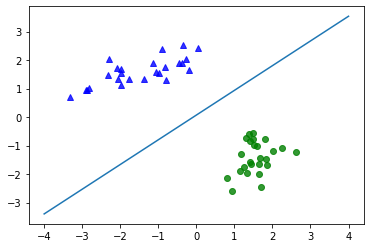

In [60]:
plt.plot(xx,yy)
plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)